In [92]:
import time
import warnings

from copy import deepcopy


from sklearn import cluster, datasets, mixture
from sklearn.neighbors import kneighbors_graph
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

from itertools import cycle, islice

import timeit
import scanpy as sc
import numpy as np
import pandas as pd
import anndata as ad
from matplotlib import pyplot as plt
from sklearn.decomposition import PCA
adata = sc.read_10x_mtx(
    'C:/Users/Computer/Desktop/pbmc3k_filtered_gene_bc_matrices.tar/pbmc3k_filtered_gene_bc_matrices/hg19',  # the directory with the `.mtx` file
    var_names='gene_symbols',                  # use gene symbols for the variable names (variables-axis index)
    cache=True)   

x = adata._X.todense()
x.shape #shape of the data

(2700, 32738)

In [93]:
marker_genes = ['IL7R','CCR7','S100A4','GNLY','NKG7','MS4A1','CD8A',
                'FCGR3A','MS4A7','CD14','LYZ','FCER1A','CST3','PPBP']
#create a list with all marker genes

In [94]:
dataframe_total = adata.to_df()

In [95]:
dataframe_markergenes = dataframe_total[marker_genes].copy()

In [96]:
dataframe_markergenes

,IL7R,CCR7,S100A4,GNLY,NKG7,MS4A1,CD8A,FCGR3A,MS4A7,CD14,LYZ,FCER1A,CST3,PPBP
0,,,,,,,,,,,,,,
AAACATACAACCAC-1,3.0,1.0,3.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAACATTGAGCTAC-1,2.0,0.0,0.0,0.0,1.0,6.0,0.0,0.0,0.0,0.0,3.0,0.0,1.0,0.0
AAACATTGATCAGC-1,1.0,0.0,5.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,1.0,0.0
AAACCGTGCTTCCG-1,0.0,0.0,16.0,0.0,1.0,0.0,0.0,1.0,3.0,0.0,24.0,0.0,22.0,1.0
AAACCGTGTATGCG-1,0.0,0.0,5.0,3.0,11.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AAACGCACTGGTAC-1,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAACGCTGACCAGT-1,2.0,0.0,2.0,5.0,5.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAACGCTGGTTCTT-1,3.0,0.0,4.0,0.0,2.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
AAACGCTGTAGCCA-1,0.0,0.0,3.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [97]:
pca=PCA(n_components=14)
pca_markergenes=pca.fit_transform(dataframe_markergenes)
pca_markergenes.shape

(2700, 14)

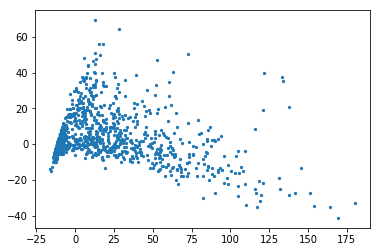

In [98]:
plt.scatter(pca_markergenes[:,0], pca_markergenes[:,1], s = 5)

In [100]:
def dist(a, b, ax=1):
    return np.linalg.norm(a - b, axis=ax)
X = np.array(pca_markergenes)
n_samples=1000


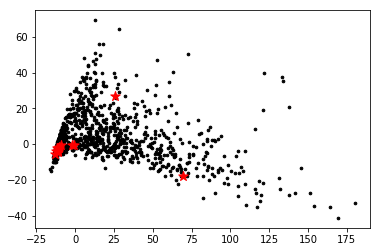

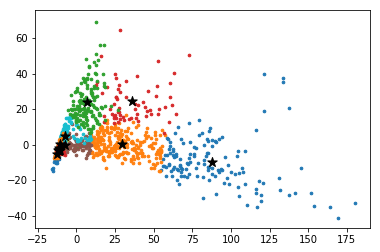

In [107]:
k=14
  
Indecies_centroid = np.random.choice(n_samples,size=k) 
    
C=X[Indecies_centroid]

plt.scatter(X[:,0],X[:,1],c='black',s=7)
plt.scatter(C[:, 0], C[:, 1],marker='*',c='red',s=100)
    
clusters = np.zeros(len(X))
C_old = np.zeros(C.shape)
update_centroids = dist(C, C_old) # Konvergenz

while update_centroids.all() != 0:
    for i in range(len(X)):
            distances = dist(C,[X[i]])
            cluster = np.argmin(distances)
            clusters[i] = cluster
    C_old = deepcopy(C)
    for i in range(k):
        points = [X[j] for j in range(len(X)) if clusters[j] == i]
        C[i] = np.mean(points, axis=0)
    update_centroids = dist(C, C_old)
        
fig, ax = plt.subplots()
for i in range(k):
        points = np.array([X[j] for j in range(len(X)) if clusters[j] == i])
        ax.scatter(points[:, 0], points[:, 1], s=7)
ax.scatter(C[:, 0], C[:, 1], marker='*', c='black', s=100)

In [108]:
k_all=(2,3,5,10) # hier kann man die Anzahl an k, die man vergleichen will, einfach eingeben

WSS_own = np.zeros(4)

for l in range(4):
    k=k_all[l]
    
    times_to_repeat = 10

    sum_WSS = 0
    
    
    for j in range (times_to_repeat):


        start_time = timeit.default_timer()


        Indecies_centroid = np.random.choice(n_samples,size=k) # for initialization we choose some random datapoint in order to avoid that no data points were assigned to random centroid


        C=X[Indecies_centroid]

        clusters = np.zeros(len(X))
        C_old = np.zeros(C.shape)
        error = dist(C, C_old) # Konvergenz
        from copy import deepcopy

        while error.all() != 0:
            for i in range(len(X)):
                    distances = dist(C,[X[i]])
                    cluster = np.argmin(distances)
                    clusters[i] = cluster
            C_old = deepcopy(C)
            for i in range(k):
                points = [X[j] for j in range(len(X)) if clusters[j] == i]
                C[i] = np.mean(points, axis=0)
            error = dist(C, C_old)


        
        WSS=0

        for j in range(len(X)):
        
            WSS += dist(X[j],C[int(clusters[j])], ax = 0)**2
  
        sum_WSS=sum_WSS+WSS
    
    average_WSS= (sum_WSS/times_to_repeat)
    
      
    
    WSS_own[l]=average_WSS
   
    print(WSS_own)
        



[1295810.50360945       0.               0.               0.        ]
[1295810.50360945  861264.38433527       0.               0.        ]
[1295810.50360945  861264.38433527  625732.59017323       0.        ]
[1295810.50360945  861264.38433527  625732.59017323  421851.34747981]
